In [1]:
import numpy as np
import matplotlib.pyplot as pl
import scipy.io as mat
import pandas as pd
%matplotlib inline

In [2]:
data = mat.loadmat('ex4data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [3]:
XX = data['X']
y = data['y'][:,0]
# matrix representation of y
M = XX.shape[0]
ymat = np.zeros((M,10), dtype=int)
for i in range(M):
    ymat[i,np.int(y[i])-1] = 1
    
print('dimension of features: ', XX.shape)
print('number of training samples: ', y.shape)
print('ymat shape: ', ymat.shape)

dimension of features:  (5000, 400)
number of training samples:  (5000,)
ymat shape:  (5000, 10)


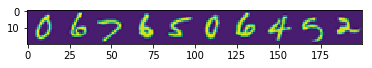

In [4]:
from numpy.random import randint
indx = randint(5000, size=10)
pl.imshow(XX[indx,:].reshape(10*20,20).T)

In [5]:
jndx = randint(5000, size=10)
print(y[jndx])

[ 8  8  2  8 10  7  4  4 10  6]


In [6]:
weights = mat.loadmat('ex4weights.mat')
weights.keys()
Thtrain1 = weights['Theta1']
Thtrain2 = weights['Theta2']
print('theta1 shape:{}'.format(Thtrain1.shape))
print('theta2 shape:{}'.format(Thtrain2.shape))

theta1 shape:(25, 401)
theta2 shape:(10, 26)


The network includes three layers: input layer, one hidden layer and output layer. Dimension of each layers are
Input layer: 400+1 features
Hidden layer: 26
Outputlayer: 10

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \sum_{k=1}^K \left[ -y_k^{(i)} \log((h_\theta(x^{(i)}))_k) 
-(1 - y_k^{(i)}) \log((1 - h_\theta(x^{(i)}))_k)\right]$$

In [7]:
# define sigmoid function
def sigmoid(z):
    return (1./(1. + np.exp(-z)))

In [8]:
def sig_derv(z):
    return sigmoid(z)*(1-sigmoid(z))

In [9]:
# define cost function, flatten multi thetas into one vector
# This function is defined for a network with just one hidden layer
def Jcost(theta_params, input_layer_size, hidden_layer_size, num_labels,
          X, ymat, reg):
    """ function to calculate the cost function of classification using 
    using neural network.
    input:
    ------
    theta_params: vec(float), flatten theta matrices
    input_layer_size: int
    hidden_layer_size: int, assumed just one hidden layer
    num_labels: int, number of labels for classification
    X: float, mat(m,n), training set features
    y: float vec, target
    
    return:
    -------
    JJ: float, cost function
    argmax(...): forward propagation, prediction
    theta_grad: vec, gradient respect to both theta1 & theta2
    """
    d1 = input_layer_size
    d2 = hidden_layer_size
    d3 = num_labels
    
    theta1 = theta_params[:d2*(d1+1)].reshape(d2,d1+1)
    theta2 = theta_params[d2*(d1+1):].reshape(d3,d2+1)
    
    M = X.shape[0]
    # adding x0=1 feature to all entries
    a1 = np.c_[np.ones(X.shape[0]), X] # 5000x401
    # Fist layer
    a2 = sigmoid(theta1.dot(a1.T)) # 25x401 * 401x5000 = 25x5000
    
    # Second layer
    a2 = np.c_[np.ones(a2.shape[1]), a2.T] #(26, 5000)
    a3 = (sigmoid(theta2.dot(a2.T))).T
    
    JJ = -(1./M) * np.sum( np.log(a3)*ymat + np.log(1 - a3)*(1-ymat) ) + \
          (0.5*reg/M) * ( np.sum(np.square(theta1[:,1:])) +\
                         np.sum(np.square(theta2[:,1:])) )
    # return
    return JJ #, (np.argmax(a3.T,axis=1)+1), theta_grad

In [10]:
# Check with the second version of costfunction
theta_vec = np.r_[Thtrain1.ravel(), Thtrain2.ravel()]
print(Jcost(theta_vec, 400, 25, 10, XX, ymat, 1))

0.383769859091


In [11]:
# define cost function, flatten multi thetas into one vector
# This function is defined for a network with just one hidden layer
def predict_forward(theta_params, input_layer_size, hidden_layer_size, num_labels,
          X):
    """ function to calculate the cost function of classification using 
    using neural network.
    input:
    ------
    theta_params: vec(float), flatten theta matrices
    input_layer_size: int
    hidden_layer_size: int, assumed just one hidden layer
    num_labels: int, number of labels for classification
    X: float, mat(m,n), training set features
    
    return:
    -------
    argmax(...): forward propagation, prediction
    """
    d1 = input_layer_size
    d2 = hidden_layer_size
    d3 = num_labels
    
    theta1 = theta_params[:d2*(d1+1)].reshape(d2,d1+1)
    theta2 = theta_params[d2*(d1+1):].reshape(d3,d2+1)
    
    M = X.shape[0]
    # adding x0=1 feature to all entries
    a1 = np.c_[np.ones(X.shape[0]), X] # 5000x401
    # Fist layer
    z2 = theta1.dot(a1.T) # 25x401 * 401x5000 = 25x5000
    a2 = sigmoid(z2) # 25x5000
    
    # Second layer
    a2 = np.c_[np.ones(a2.shape[1]), a2.T] #(26, 5000)
    z3 = theta2.dot(a2.T)
    a3 = sigmoid(z3)             #(10, 5000)
     
    # return
    return (np.argmax(a3.T,axis=1)+1)

In [12]:
# define cost function, flatten multi thetas into one vector
# This function is defined for a network with just one hidden layer
def Jcost_grad(theta_params, input_layer_size, hidden_layer_size, num_labels,
          X, ymat, reg):
    """ function to calculate the cost function of classification using 
    using neural network.
    input:
    ------
    theta_params: vec(float), flatten theta matrices
    input_layer_size: int
    hidden_layer_size: int, assumed just one hidden layer
    num_labels: int, number of labels for classification
    X: float, mat(m,n), training set features
    y: float vec, target
    
    return:
    -------
    JJ: float, cost function
    argmax(...): forward propagation, prediction
    theta_grad: vec, gradient respect to both theta1 & theta2
    """
    d1 = input_layer_size
    d2 = hidden_layer_size
    d3 = num_labels
    
    theta1 = theta_params[:d2*(d1+1)].reshape(d2,d1+1)
    theta2 = theta_params[d2*(d1+1):].reshape(d3,d2+1)
    
    M = X.shape[0]
    
    # adding x0=1 feature to all entries
    a1 = np.c_[np.ones(X.shape[0]), X] # 5000x401
    # Fist layer
    z2 = theta1.dot(a1.T) # 25x401 * 401x5000 = 25x5000
    a2 = sigmoid(z2) # 25x5000
    
    # Second layer
    a2 = np.c_[np.ones(a2.shape[1]), a2.T] #(26, 5000)
    z3 = theta2.dot(a2.T)
    a3 = sigmoid(z3)             #(10, 5000)
    
    # gradient of cost function:
    d3 = a3 - ymat.T # 10x5000
    
    d2 = (theta2[:,1:].T.dot(d3)) * sig_derv(z2) #(25,10)x(10,5000) ~ (25,5000)
    
    D1 = d2.dot(a1) # (25,5000)x(5000,401) ~ (25,401)
    D2 = d3.dot(a2) # (10,5000)x(5000,26) ~ (10,26)
    
    # excluding the bias term from regularization
    thet1_ = np.c_[np.zeros((theta1.shape[0],1)), theta1[:,1:]]
    thet2_ = np.c_[np.zeros((theta2.shape[0],1)), theta2[:,1:]]
    
    theta1_grad = (D1 + thet1_*reg)/M
    theta2_grad = (D2 + thet2_*reg)/M

    theta_grad = np.r_[theta1_grad.ravel(), theta2_grad.ravel()]
    # return
    return theta_grad

In [13]:
# Check with the second version of costfunction
theta_vec = np.r_[Thtrain1.ravel(), Thtrain2.ravel()]
print(Jcost(theta_vec, 400, 25, 10, XX, ymat, 0))
print(Jcost(theta_vec, 400, 25, 10, XX, ymat, 1))
# accuracy of training
#acc = np.mean(Jcost(theta_vec, 400, 25, 10, XX, y, 1)[1] == y)
#print('accuracy of training is {}'.format(acc))
#y[0:10]

0.287629165161
0.383769859091


How to perform backpropagation to fit the weight parameter $\theta_1$ and $\theta_2$

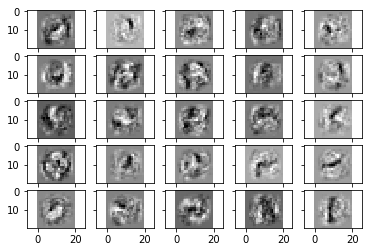

In [14]:
# Dispalying hidden layer
fig, ax = pl.subplots(5,5, sharey=True, sharex=True)
for i in range(5):
    for j in range(5):
            ax[i,j].imshow(Thtrain1[i*5+j,1:].reshape(20,20), cmap='gray')
# random initialization 
#res = minimize(costF, theta_int, args=(beta,XX, target_i), method=None,
#                        jac=grad_costF, options={'maxiter':50})
#        all_theta[i-1] = res.x

In [15]:
# random initialization 
from scipy.optimize import minimize
theta_init = 0.24*np.random.rand(theta_vec.size) - 0.12
#theta_init = theta_vec + .01*np.random.rand(theta_vec.size)
#Jcost(theta_params, input_layer_size, hidden_layer_size, num_labels,
#          X, y, reg)
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10
reg = 100
# This optimization is very slow for this problem
#res = minimize(Jcost, theta_init, args=(input_layer_size, hidden_layer_size, num_labels,
#          XX, ymat, reg), jac=Jcost_grad, method=None, options={'maxiter':100, 'disp':True})
res2 = minimize(Jcost, theta_init, args=(input_layer_size, hidden_layer_size, num_labels,
          XX, ymat, reg), method="CG", jac=Jcost_grad, options={'maxiter':1000, "disp":True})
#print(res.x)

Optimization terminated successfully.
         Current function value: 2.481511
         Iterations: 273
         Function evaluations: 544
         Gradient evaluations: 544


In [16]:
#print(np.mean(predict_forward(res.x, input_layer_size, hidden_layer_size, num_labels,XX) == y))
print(np.mean(predict_forward(res2.x, input_layer_size, hidden_layer_size, num_labels,XX) == y))

0.848


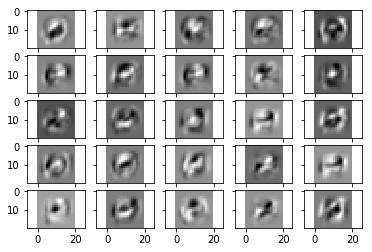

In [17]:
the1 = res2.x[0:401*25].reshape(25,401)
fig, ax = pl.subplots(5,5, sharey=True, sharex=True)
for i in range(5):
    for j in range(5):
            ax[i,j].imshow(the1[i*5+j,1:].reshape(20,20), cmap='gray')
